# Welcome to Lab Session 4 - Derek Thomas - 14Oct2017

## Define & setup the environment

In [1]:
import pandas as pd
import numpy as np
#import pandas_datareader as pdr
#from pandas_datareader import data, wb
#import urllib3
#http = urllib3.PoolManager()
import string
import re
import json
#from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

## Import various Datasets to be used in SCU MSIS Dashboard

### Dataset-1 is a list of 50 Best for Jobs in America for 2017 compiled by Glassdoor
Reference: https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm

Raw Dataset-1 prior to scraping:

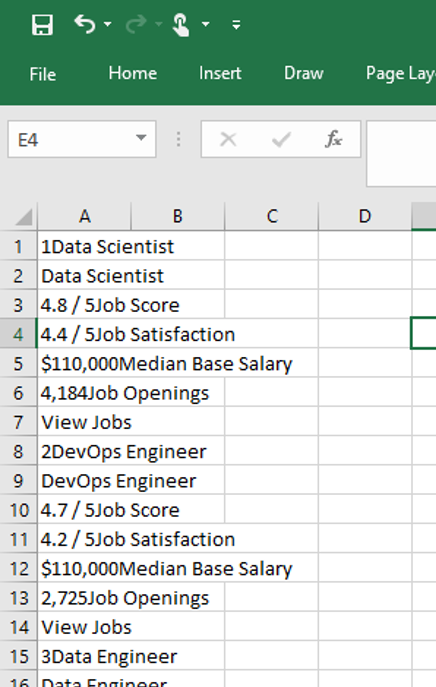

Dataset-1 utilizing Excel formulas as a means to scrape raw data and capure Dataset-1:

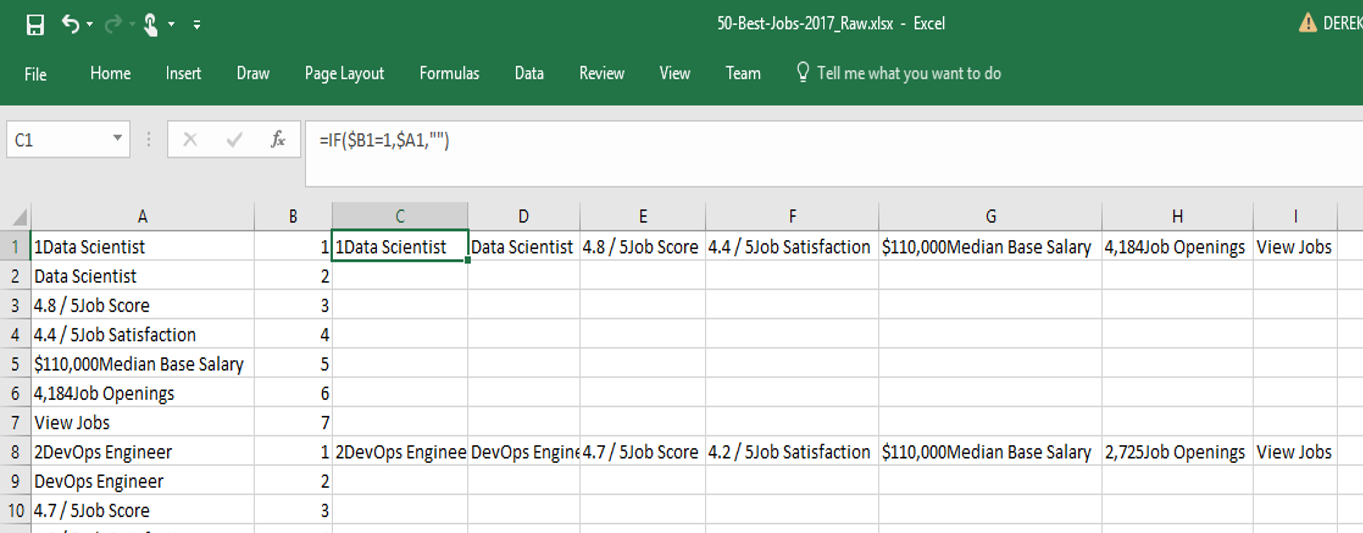
    
    

Dataset-1 Final result after Excel Scraping

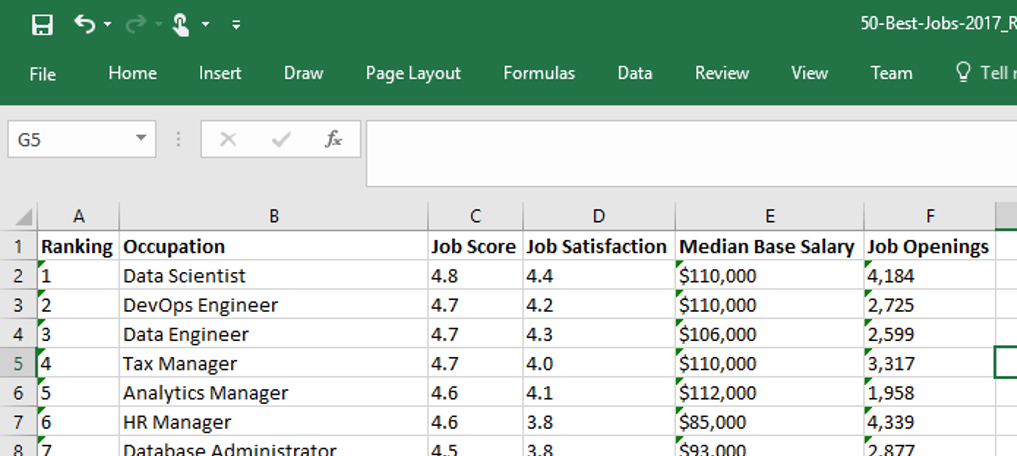

### Dataset-1 - Read in "50 Best Jobs in 2017"

In [93]:
dfJobs = pd.read_excel('50-Best-Jobs-2017.xlsx', sheetname='Final', header=0)
dfJobs.head(4)

,Ranking,Occupation,Job Score,Job Satisfaction,Median Base Salary,Job Openings
0,1,Data Scientist,4.8,4.4,110000,4184
1,2,DevOps Engineer,4.7,4.2,110000,2725
2,3,Data Engineer,4.7,4.3,106000,2599
3,4,Tax Manager,4.7,4.0,110000,3317


### Dataset-2 and Dataset 3 are SCUs MSIS Specialization Tracks and associated Course listings
Reference: https://www.scu.edu/business/ms-information-systems/curriculum/specialization-tracks/

Raw Datasets 2 & 3 prior to scraping:

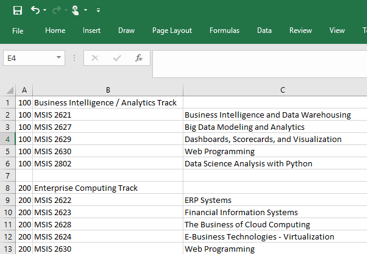

Dataset-1 Final result after Excel Scraping

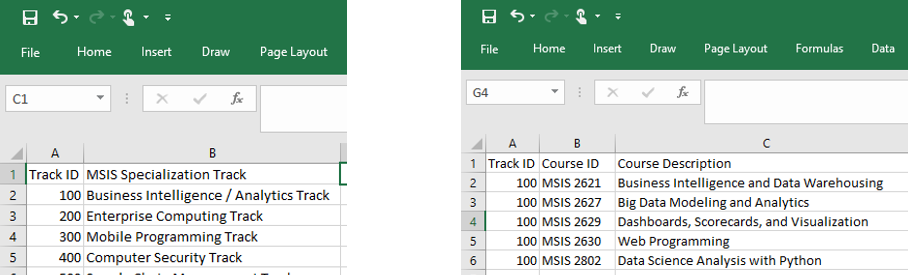

### Dataset-2 - Read in "SCU MSIS Specialization Tracks"

In [94]:
dfTracks = pd.read_excel('SCU-MSIS-Curriculum.xlsx', sheetname='Tracks', header=0)
dfTracks.head(4)

,Track ID,MSIS Specialization Track
0,100,Business Intelligence / Analytics Track
1,200,Enterprise Computing Track
2,300,Mobile Programming Track
3,400,Computer Security Track


### Dataset-3 - Read in "SCU MSIS Courses"

In [95]:
dfCourses = pd.read_excel('SCU-MSIS-Curriculum.xlsx', sheetname='Courses', header=0)
dfCourses.head(4)

,Track ID,Course ID,Course Description
0,100,MSIS 2621,Business Intelligence and Data Warehousing
1,100,MSIS 2627,Big Data Modeling and Analytics
2,100,MSIS 2629,"Dashboards, Scorecards, and Visualization"
3,100,MSIS 2630,Web Programming


In [96]:
dfCourses2 = dfCourses.copy()
dfCourses2['College/University'] = dfCourses['Track ID'].map(lambda x: 'Santa Clara University' if x > 0 else "")
dfCourses2.head(4)

,Track ID,Course ID,Course Description,College/University
0,100,MSIS 2621,Business Intelligence and Data Warehousing,Santa Clara University
1,100,MSIS 2627,Big Data Modeling and Analytics,Santa Clara University
2,100,MSIS 2629,"Dashboards, Scorecards, and Visualization",Santa Clara University
3,100,MSIS 2630,Web Programming,Santa Clara University


### Dataset-4 - College Scorecard, Department of Education, ED.gov, 2015-2016 Dataset
Reference: https://catalog.data.gov/dataset/college-scorecard

### Dataset-4 - Read in "College Scorecard" data from provided .csv file

In [97]:
dfScorecard = pd.read_csv('MERGED2015_16_PP.csv', header=0)
dfScorecard.head(4)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,NaN,NaN,NaN,NaN,NaN,4210.0,2.0,NaN,1123.0,SACSCC
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,NaN,NaN,NaN,NaN,NaN,11679.0,2.0,242.0,6822.0,SACSCC
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,NaN,NaN,279.0,1.0,NaN,319.0,SACSCC
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,5618.0,2.0,184.0,1853.0,SACSCC


Filter Scorecard Daset to only include "Masters Colleges & Universities" (CCBASIC = 18), and "Main Campus" colleges (MAIN = 1) in order to compare Santa University to similar format Colleges & Universities.

In [98]:
dfScorecard2 = dfScorecard[((dfScorecard['CCBASIC'] == 18) & (dfScorecard['MAIN'] == 1))]
dfScorecard2.head(4)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,NaN,NaN,NaN,NaN,NaN,4210.0,2.0,NaN,1123.0,SACSCC
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,NaN,NaN,NaN,NaN,4805.0,2.0,24.0,619.0,SACSCC
8,100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,Southern Association of Colleges and Schools C...,www.aum.edu,www.aum.edu/current-students/financial-informa...,...,NaN,NaN,NaN,NaN,NaN,4377.0,2.0,115.0,662.0,SACSCC
26,101480,102000,1020,Jacksonville State University,Jacksonville,AL,36265,Southern Association of Colleges and Schools C...,www.jsu.edu/,www.jsu.edu/finaid/,...,NaN,NaN,NaN,NaN,NaN,7647.0,2.0,758.0,931.0,SACSCC


### Dataset-5 - Money Magazine's "Best Colleges for your Money 2017"
Reference: https://www.scu.edu/business/news/top-stories/leavey-school-ranked-10-in-the-country-for-undergraduate-business-by-money-magazine.html

Raw Dataset-5 as HTML prior to scraping:

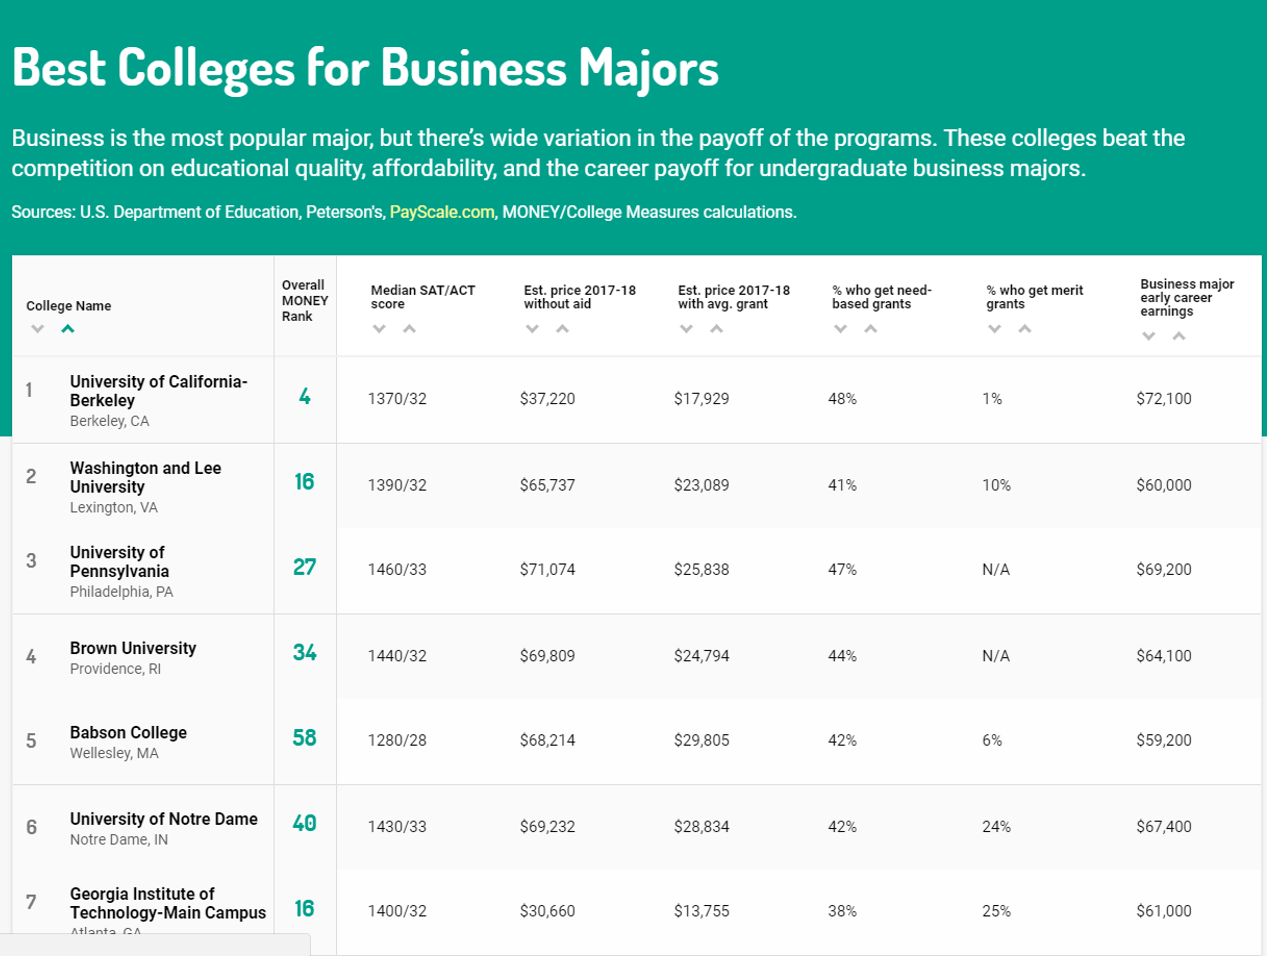

Dataset-5 after Excel scraping:

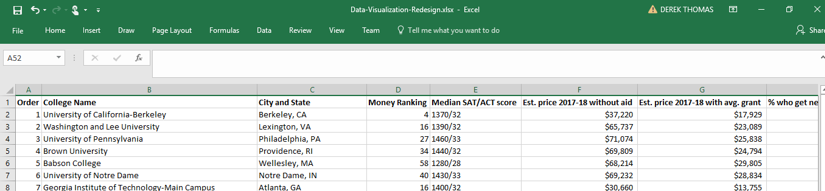

### Dataset-5 - Read in Money Magazine's 50 Best Colleges for 2017" data from Excel file

In [99]:
dfBestColleges = pd.read_excel('BestColleges_2017.xlsx', header=0)
dfBestColleges.head(4)

,Order,College Name,City and State,Money Ranking,Median SAT/ACT score,Est. price 2017-18 without aid,Est. price 2017-18 with avg. grant,% who get need-based grants,% who get merit grants,Business major early career earnings
0,1.0,University of California-Berkeley,"Berkeley, CA",4.0,1370/32,37220.0,17929.0,0.48,0.01,72100.0
1,2.0,Washington and Lee University,"Lexington, VA",16.0,1390/32,65737.0,23089.0,0.41,0.10,60000.0
2,3.0,University of Pennsylvania,"Philadelphia, PA",27.0,1460/33,71074.0,25838.0,0.47,NaN,69200.0
3,4.0,Brown University,"Providence, RI",34.0,1440/32,69809.0,24794.0,0.44,NaN,64100.0


## The 5 Datasets are ready for Tableau
1. D1_50BestJobs2017.csv
2. D2_SCUMSISTracks.csv
3. D3_SCUMSISCourses.csv
4. D4_CollegeScorecard201516.csv
5. D5_50BestColleges2017.csv

### Write Dataframes to .csv files

In [100]:
dfJobs.to_csv('D1_50BestJobs2017.csv')
dfTracks.to_csv('D2_SCUMSISTracks.csv')
dfCourses2.to_csv('D3_SCUMSISCourses.csv')
dfScorecard2.to_csv('D4_CollegeScorecard201516.csv')
dfBestColleges.to_csv('D5_50BestColleges2017.csv')

## Argument Framework

### Claim

The MSIS program at Santa Clara University is in the top 10 percentile of Colleges/University in California.

### Data (Evidence)

- D1_50BestJobs2017.csv - Dataset contains the 50 top job occupations for 2017
    - This Dataset is not used in the current iteration, but reserved for later use
---------------------------------
- D2_SCUMSISTracks.csv - Dataset contains the Santa Clara University MSIS program main concentration Tracks
    - This Dataset is not used in the current iteration, but reserved for later use
---------------------------------
- D3_SCUMSISCourses.csv - Dataset contains the Santa Clara University MSIS curriculum offered as of Oct 2017
    - This Dataset is not used in the current iteration, but reserved for later use
---------------------------------
- D4_CollegeScorecard201516.csv - Dataset contains a comprehensive listing of all Colleges/Universities and various statistics
    - The Dataset is filtered to include only the California Colleges/Universities and will connect to the "50-best Colleges" Dataset (D5) based on College/University Name
---------------------------------
- D5_50BestColleges2017.csv - Dataset contains the top 50 U.S. Colleges/Universities for Business Majors
    - The Dataset has been filtered to only include California Colleges/Universites

### Warrants

- Santa Clara University ranks in the top ten percentile of California colleges for applicants with high average SAT percentage (SAT_AVG)
    - It is inferred that if the University has a high number of applicants with higher than average SAT scores, the classroom discussions will be at a level more conducive to learning, and increae the overall effectiveness of the degree program.
----------------------------------
- Sanata Clara University ranks in the top ten percentile of California colleges in the percentage of degrees awarded in Computer and Information Systems (PCIP11)
    - The assumption is that if the University has awarded a higher number of degrees in Computers and Information Systems over similar programs, the University has prioritized this field of study, invested sufficient resources in this area to include quality faculty, and will produce a better MSIS program 
----------------------------------
- Santa Clara University ranks in the top ten percentile of California colleges for its degree completion rate for first-time, full-time students (C150_4)
    - This will support and contribute to recruiting effectiveness by assuring prospective students that the University has among the highest completion rate of students who start the program, inferring that the program is of high quality to retain enrolled students.
----------------------------------
- In relation to student body size, Santa Clara University rates in the top ten percentile of its number of graduate students (GRADS)
    - This is supported by the inference that high numbers of graduate students translate into successful reputable degree programs

### Reservations

 - The SAT averages, percentage of degrees awarded in Computer & Information Systems, and Completion rate for first-time, full-time students are based on Undergraduate statistics and may not ncecessarily translate to the College/University graduate programs